# Demonstration of Automatic Data Processing

## Clean data set example

8/25/20

### Notebook setup and library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# PVInsight Code Imports
from solardatatools import DataHandler
from solardatatools.dataio import get_pvdaq_data

### Load data table from external source

For today's example, we're loading data from NREL's PVDAQ API, which is a publically available PV generatation data set. 

In [3]:
data_frame = get_pvdaq_data(sysid=34, year=range(2011, 2015), api_key='DEMO_KEY')

[============================================================] 100.0% ...queries complete in 5.3 seconds       



### Running the `DataHandler` processing pipeline

In [4]:
dh = DataHandler(data_frame)
dh.run_pipeline(power_col='ac_power')
dh.report()


            *********************************************
            * Solar Data Tools Data Onboarding Pipeline *
            *********************************************

            This pipeline runs a series of preprocessing, cleaning, and quality
            control tasks on stand-alone PV power or irradiance time series data.
            After the pipeline is run, the data may be plotted, filtered, or
            further analyzed.

            Authors: Bennet Meyers and Sara Miskovich, SLAC

            (Tip: if you have a mosek [https://www.mosek.com/] license and have it
            installed on your system, try setting solver='MOSEK' for a speedup)

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


task list: 100%|██████████████████████████████████| 7/7 [00:16<00:00,  2.43s/it]



total time: 17.01 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.51s
Cleaning                   0.13s
Filtering/Summarizing      14.37s
    Data quality           0.10s
    Clear day detect       0.18s
    Clipping detect        4.69s
    Capacity change detect 9.40s


-----------------
DATA SET REPORT
-----------------
length               4.00 years
capacity estimate    107.10 kW
data sampling        15 minutes
quality score        0.96
clearness score      0.55
inverter clipping    False
clipped fraction     0.00
capacity changes     False
data quality warning True
time shift errors    False
time zone errors     False
            


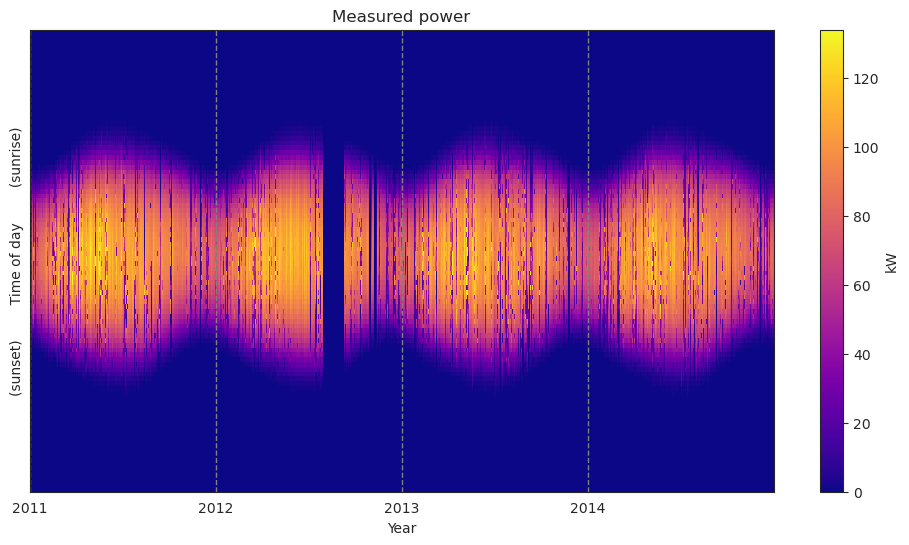

In [5]:
dh.plot_heatmap(matrix='filled', scale_to_kw=True);

In [6]:
dh.run_loss_factor_analysis()


            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


9it [00:11,  1.40s/it]/Users/bennetm/miniconda3/envs/pvi-dev/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
10it [00:13,  1.37s/it]

P50, P02.5, P97.5: -1.536, -1.678, -1.301
changes: -2.673e-02, 0.000e+00, 0.000e+00


20it [00:28,  1.47s/it]

P50, P02.5, P97.5: -1.482, -1.702, -0.912
changes: -3.710e-02, 0.000e+00, 0.000e+00


30it [00:42,  1.52s/it]

P50, P02.5, P97.5: -1.482, -1.930, -0.923
changes: -1.240e-02, 5.126e-04, -4.360e-03


40it [00:58,  1.63s/it]

P50, P02.5, P97.5: -1.461, -2.062, -0.951
changes: 1.045e-02, 4.763e-03, -3.122e-03


50it [01:12,  1.41s/it]

P50, P02.5, P97.5: -1.515, -2.014, -0.982
changes: 8.566e-03, 4.763e-03, -3.122e-03


60it [01:26,  1.40s/it]

P50, P02.5, P97.5: -1.532, -1.966, -1.014
changes: -8.566e-03, 4.763e-03, -3.122e-03


64it [01:34,  1.47s/it]


Performing loss factor analysis...

                    ***************************************
                    * Solar Data Tools Loss Factor Report *
                    ***************************************

                    degradation rate [%/yr]:                    -1.546
                    deg. rate 95% confidence:          [-1.962, -1.029]
                    total energy loss [kWh]:              -227916115.4
                    bulk deg. energy loss (gain) [kWh]:    -31503981.1
                    soiling energy loss [kWh]:             -28038937.3
                    capacity change energy loss [kWh]:        -13440.9
                    weather energy loss [kWh]:            -116509044.4
                    system outage loss [kWh]:              -51850711.7
                    


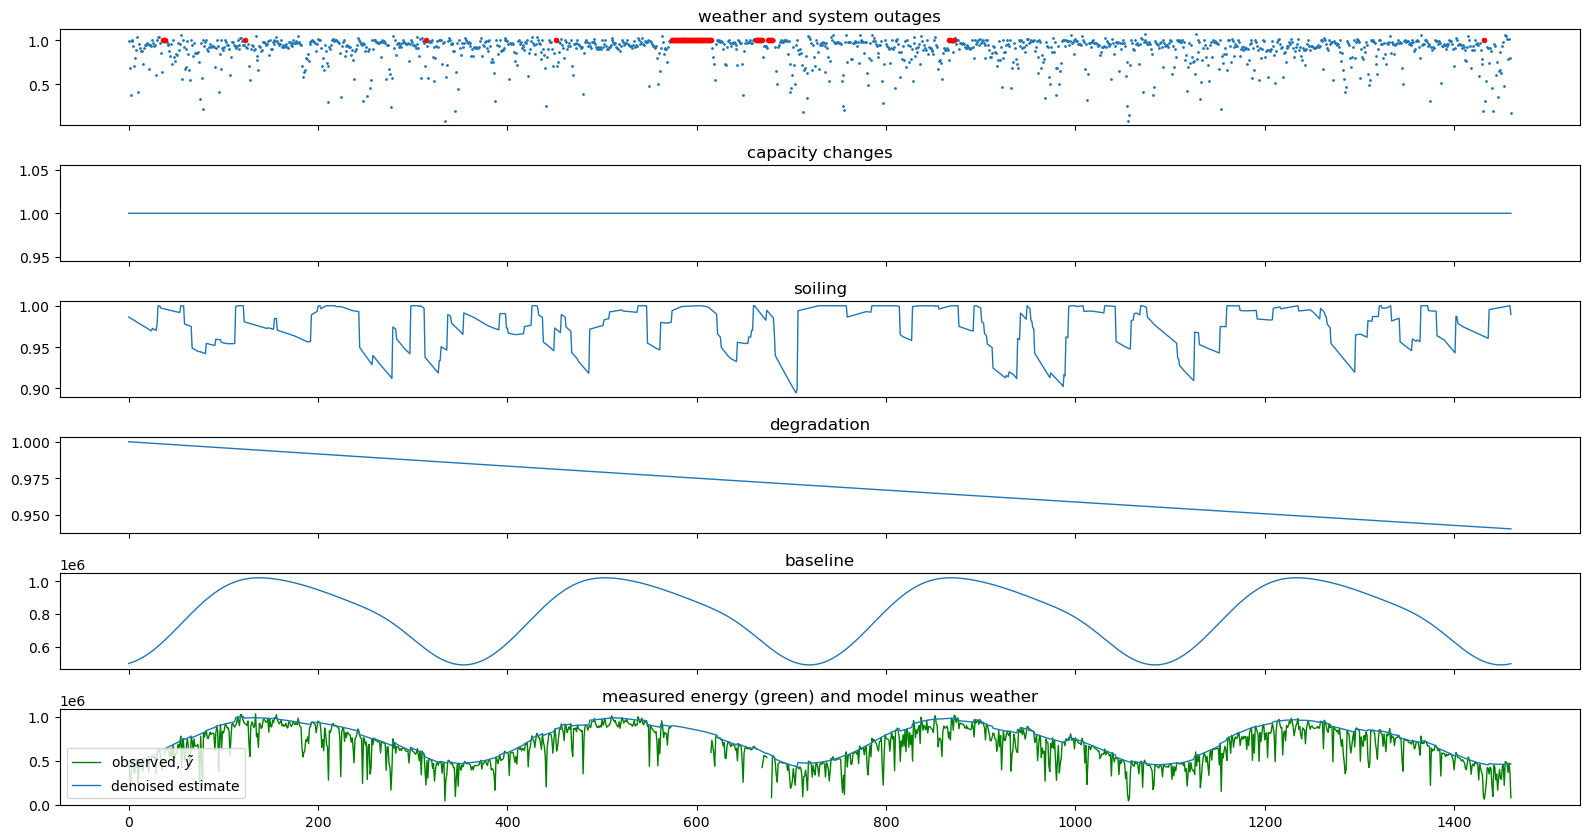

In [7]:
dh.loss_analysis.plot_decomposition();